## 선형 모델

입력 특성에 대한 `선형 함수`를 만들어 예측을 수행
```
y=w[0]*x[0]+b
```

w, b는 모델이 학습할 파라미터

y는 예측값

#### 선형 모델은 feature가 많을 때 훌륭한 성능을 낼 수 있음!!!

w[0]: 0.393906  b: -0.031804


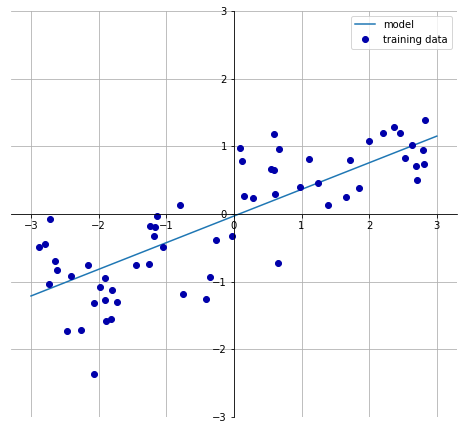

In [3]:
# 1차원 wave데이터셋으로 파라미터 w[0]와 b를 직선 처럼 되도록 학습 시켜보기!
import mglearn
mglearn.plots.plot_linear_regression_wave()
# 요놈은 1차원 데이터라 조금 무시된게 많아보임!!! -> feature가 많을 시 성능 우수해짐

#### 선형 회귀(최소제곱법)

선형 회귀는 가장 간단하고 오래된 회귀용 선형 알고리즘

선형 회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차를 최소화하는 파라미터 w와 b를 찾음.



In [6]:
# 위 그림의 선형 모델을 만드는 코드
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

기울기 파라미터(w)는 가중치 또는 계수라고 하며 

lr객체의 coef_ 속성에 저장어되 있고

편향 또는 절편 파라미터 (b)는 intercept_ 속성에 저장되어있음

In [9]:
lr.coef_
# coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy배열 (입력 특성 수 만큼 나옴)

array([0.39390555])

In [10]:
lr.intercept_
# 항상 실수값 1개

-0.031804343026759746

In [11]:
lr.score(X_train, y_train)

0.6700890315075756

In [16]:
lr.score(X_test, y_test)

0.65933685968637

In [17]:
# 훈련 세트와 테스트 세트의 점수가 매우 비슷!!
# => 과소적합 상태를 의미한다!
# 만약 훈련 세트 점수가 굉장히 높고 테스트가 낮으면(성능차이) 모델이 과대적합 되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야함!

### 과대적합 방지 -> 리지 회귀
모든 특성이 출력에 주는 영향을 최소한으로 만듦(기울기를 작게 만듦)

이런 제약을 규제라고하며 과대적합이 되지 않도록 모델을 강제로 제한한다는 것

리지 회귀에 사용하는 규제 방식은 L2 규제

In [22]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train)

0.885796658517094

In [23]:
ridge.score(X_test, y_test)

0.7527683481744754

### Ridge!
선형 회귀는 이 데이터셋에 과대적합 되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어짐.

모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 `일반화`된 모델이 됨.

alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지 지정할 수 있음.

매개변수의 기본값은 0.1이며, alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 도움이 됨.

In [24]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train)

0.7882787115369614

In [25]:
ridge10.score(X_test, y_test)

0.6359411489177311

In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge01.score(X_train, y_train)

0.9282273685001986

In [27]:
ridge01.score(X_test, y_test)

0.7722067936479804

In [28]:
import matplotlib.pyplot as plt

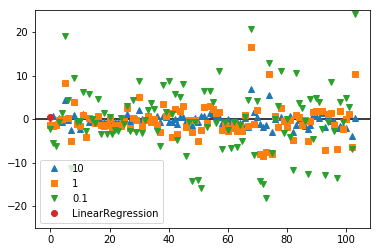

In [41]:
plt.plot(ridge10.coef_, '^', label="10")
plt.plot(ridge.coef_, 's', label="1")
plt.plot(ridge01.coef_, 'v', label="0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

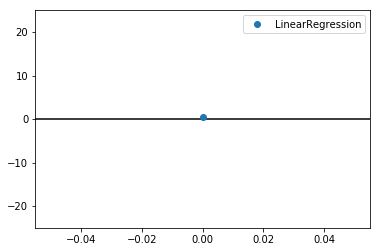

In [42]:
plt.plot(lr.coef_, 'o', label="LinearRegression")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

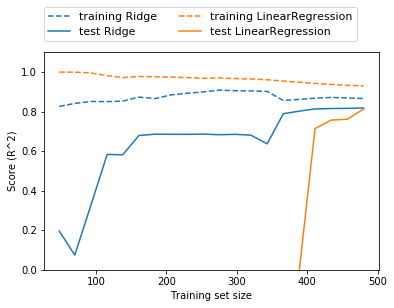

In [44]:
# 보스턴 주택가격 데이터셋에 대한 리지 회귀와 선형 회귀의 학습 곡선
mglearn.plots.plot_ridge_n_samples()

In [45]:
# 단순히 데이터가 많으면 리지나 선형회귀나 똑같아짐(과대적합 없어짐을 시사)

### 규제적용 대안 Lasso
리지회귀처럼 라소도 계수를 0에 가깝게 만들려고함

L1규제라고 함

In [46]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
lasso.score(X_train, y_train)

0.29323768991114607

In [47]:
lasso.score(X_test, y_test)

0.20937503255272294

In [48]:
# 사용한 특성의 개수
import numpy as np
np.sum(lasso.coef_ != 0)

4

In [50]:
# 완전 과소적합! => 104개 특성중 4개만 사용함
# alpha를 줄여서 과소적합을 줄여보자
# 대신 이렇게 할려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야함

In [62]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso001.score(X_train, y_train)

0.8962226511086497

In [63]:
lasso001.score(X_test, y_test)

0.7656571174549983

In [64]:
np.sum(lasso001.coef_ != 0)

33

In [65]:
# alpha 더 높혀보자

In [66]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
lasso00001.score(X_train, y_train)

0.9507158754515467

In [67]:
lasso00001.score(X_test, y_test)

0.6437467421272709

In [68]:
np.sum(lasso00001.coef_ != 0)

96

위 데이터셋은 리지가 더 낫긴한데,

특성이 많고 그중 일부분만 중요하다면 Lasso가 더 좋은 선택일 수 있음

리지랑 라소 둘다 결합한 ElasticNet도 있음. 

성능은 좋으나 L1, L2 둘다 조정해야함.

In [69]:
!git a